In [68]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
SWITCHES = np.array([[1,0,0],[1,1,0],[0,1,0],[0,1,1],[0,0,1],[1,0,1],[1,0,0]])

A_amp = []
B_amp = []
C_amp = []
for i in range(6):
    for _ in range(4):
        A_amp = np.append(A_amp, SWITCHES[i,0]*2/3-SWITCHES[i,1]*1/3-SWITCHES[i,2]*1/3)
        A_amp = np.append(A_amp, SWITCHES[i+1,0]*2/3-SWITCHES[i+1,1]*1/3-SWITCHES[i+1,2]*1/3)
        A_amp = np.append(A_amp, 0)
        B_amp = np.append(B_amp, SWITCHES[i,0]*1/3-SWITCHES[i,1]*2/3-SWITCHES[i,2]*1/3)
        B_amp = np.append(B_amp, SWITCHES[i+1,0]*1/3-SWITCHES[i+1,1]*2/3-SWITCHES[i+1,2]*1/3)
        B_amp = np.append(B_amp, 0)
        C_amp = np.append(C_amp, SWITCHES[i,0]*1/3-SWITCHES[i,1]*1/3-SWITCHES[i,2]*2/3)
        C_amp = np.append(C_amp, SWITCHES[i+1,0]*1/3-SWITCHES[i+1,1]*1/3-SWITCHES[i+1,2]*2/3)
        C_amp = np.append(C_amp, 0)

print(len(A_amp))
print(A_amp)

72
[ 0.66666667  0.33333333  0.          0.66666667  0.33333333  0.
  0.66666667  0.33333333  0.          0.66666667  0.33333333  0.
  0.33333333 -0.33333333  0.          0.33333333 -0.33333333  0.
  0.33333333 -0.33333333  0.          0.33333333 -0.33333333  0.
 -0.33333333 -0.66666667  0.         -0.33333333 -0.66666667  0.
 -0.33333333 -0.66666667  0.         -0.33333333 -0.66666667  0.
 -0.66666667 -0.33333333  0.         -0.66666667 -0.33333333  0.
 -0.66666667 -0.33333333  0.         -0.66666667 -0.33333333  0.
 -0.33333333  0.33333333  0.         -0.33333333  0.33333333  0.
 -0.33333333  0.33333333  0.         -0.33333333  0.33333333  0.
  0.33333333  0.66666667  0.          0.33333333  0.66666667  0.
  0.33333333  0.66666667  0.          0.33333333  0.66666667  0.        ]


In [70]:
M = 0.8
T = 1/24
fi = 2*np.pi*T

teta_range = np.arange(0,np.pi/3,fi)

print(teta_range)

tau_N1 = []
tau_N2 = []
tau_N0 = []
time = []
for  i  in range(6):
    for teta in teta_range:
        time = np.append(time,M * np.sqrt(3)/2 * (np.cos(teta)-1/np.sqrt(3)*np.sin(teta)))
        time = np.append(time,M * np.sin (teta))
        time = np.append(time,1-(M * np.sqrt(3)/2 * (np.cos(teta)-1/np.sqrt(3)*np.sin(teta)))-(M * np.sin (teta)))

print(time)

[0.         0.26179939 0.52359878 0.78539816]
[0.69282032 0.         0.30717968 0.56568542 0.20705524 0.22725934
 0.4        0.4        0.2        0.20705524 0.56568542 0.22725934
 0.69282032 0.         0.30717968 0.56568542 0.20705524 0.22725934
 0.4        0.4        0.2        0.20705524 0.56568542 0.22725934
 0.69282032 0.         0.30717968 0.56568542 0.20705524 0.22725934
 0.4        0.4        0.2        0.20705524 0.56568542 0.22725934
 0.69282032 0.         0.30717968 0.56568542 0.20705524 0.22725934
 0.4        0.4        0.2        0.20705524 0.56568542 0.22725934
 0.69282032 0.         0.30717968 0.56568542 0.20705524 0.22725934
 0.4        0.4        0.2        0.20705524 0.56568542 0.22725934
 0.69282032 0.         0.30717968 0.56568542 0.20705524 0.22725934
 0.4        0.4        0.2        0.20705524 0.56568542 0.22725934]


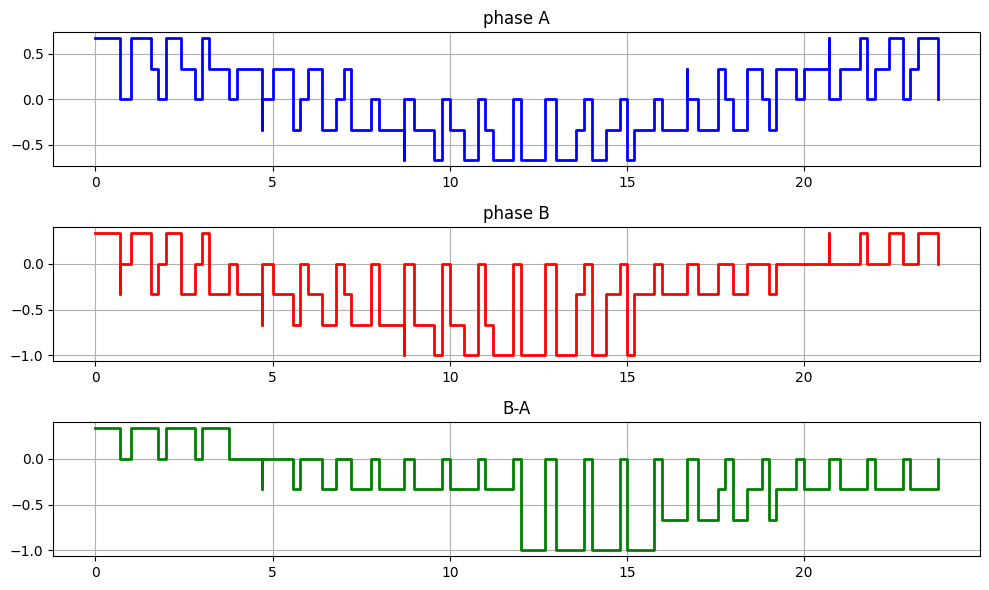

In [71]:
angle = np.arange(0, np.pi+1,  np.pi/12)
M = 0.7

tn1 = np.array([0.61, 0.49, 0.35, 0.18, 0.00, 0.49, 0.35, 0.18, 0.00, 0.49, 0.35, 0.18])
tn2 = np.array([0.00, 0.18, 0.35, 0.49, 0.61, 0.18, 0.35, 0.49, 0.61, 0.18, 0.35, 0.49])
tn0 = 1-tn1-tn2

time_start = []



VA = []
VB = []

for i in np.arange(0,12,1):
    if i < 5:
        VA  = np.append(VA,2/3)
        VA  = np.append(VA,1/3)
        VA  = np.append(VA,0)
    elif 5<=i<9:
        VA  = np.append(VA,1/3)
        VA  = np.append(VA,-1/3)
        VA  = np.append(VA,0)
    else:
        VA  = np.append(VA,-1/3)
        VA  = np.append(VA,-2/3)
        VA  = np.append(VA,0)

for i in np.arange(0,12,1):
    if i < 5:
        VB  = np.append(VB,-1/3)
        VB  = np.append(VB,1/3)
        VB  = np.append(VB,0)
    elif 5<=i<9:
        VB  = np.append(VB,1/3)
        VB  = np.append(VB,2/3)
        VB  = np.append(VB,0)
    else:
        VB  = np.append(VB,2/3)
        VB  = np.append(VB,1/3)
        VB  = np.append(VB,0)

AB = VB-VA
x_starts = np.cumsum([0] + time[:-1])
x_starts = np.insert(x_starts,0,0)

fig, axes = plt.subplots(3, 1, figsize=(10, 6))  # 2 строки, 1 столбец

axes[0].step(x_starts, A_amp, where='post', linewidth=2, color='blue')
axes[0].set_title('phase A')
axes[0].grid(True)

axes[1].step(x_starts, B_amp, where='post', linewidth=2, color='red')
axes[1].set_title('phase B')
axes[1].grid(True)

axes[2].step(x_starts, C_amp, where='post', linewidth=2, color='green')
axes[2].set_title('B-A')
axes[2].grid(True)

plt.tight_layout()  # автоматически расставит графики без наложения
plt.show()